In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-price-predictionused-cars/car data.csv


In [2]:
car_data = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [7]:
car_data = car_data.drop(columns = ['Owner'])

In [8]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission'],
      dtype='object')

In [9]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
dtype: int64

In [10]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.642584,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


# **Univariate Analysis**

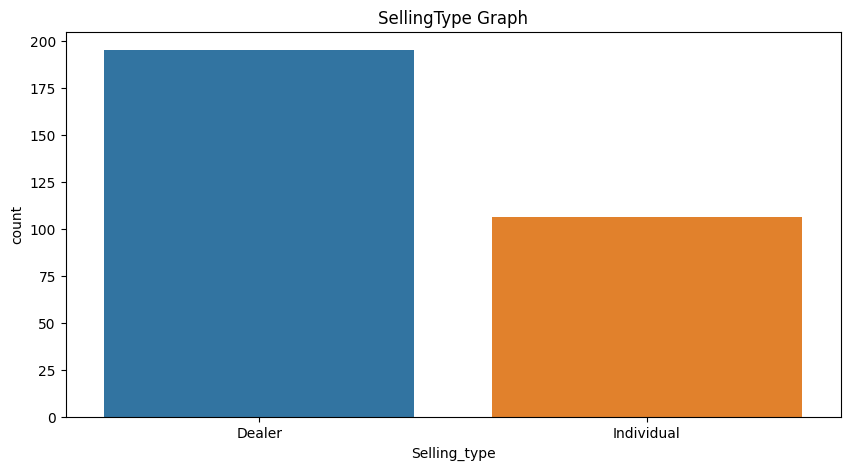

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x = 'Selling_type',data = car_data)
plt.title('SellingType Graph')
plt.show()

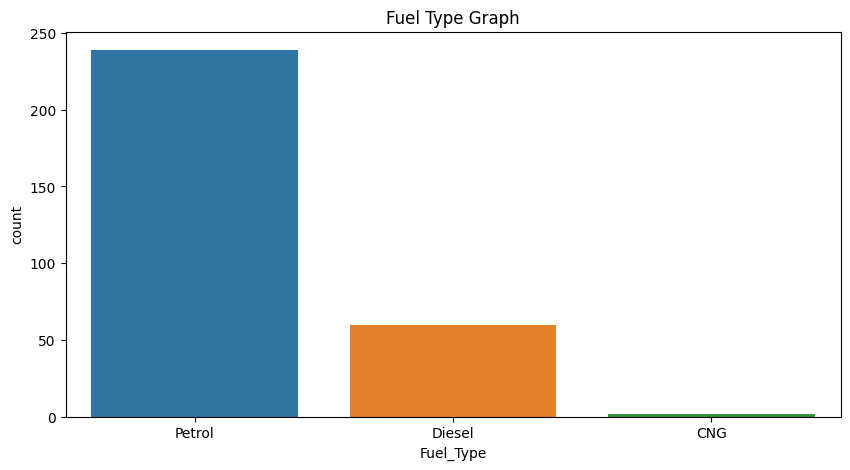

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Fuel_Type',data = car_data)
plt.title('Fuel Type Graph')
plt.show()

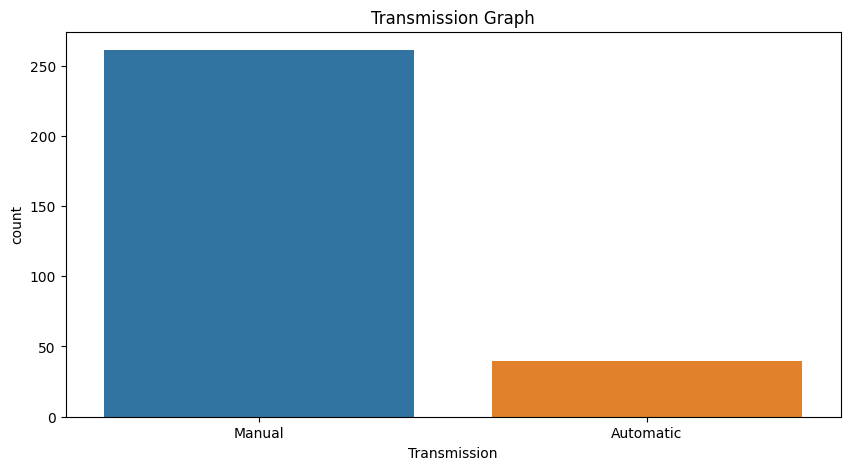

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Transmission',data = car_data)
plt.title('Transmission Graph')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


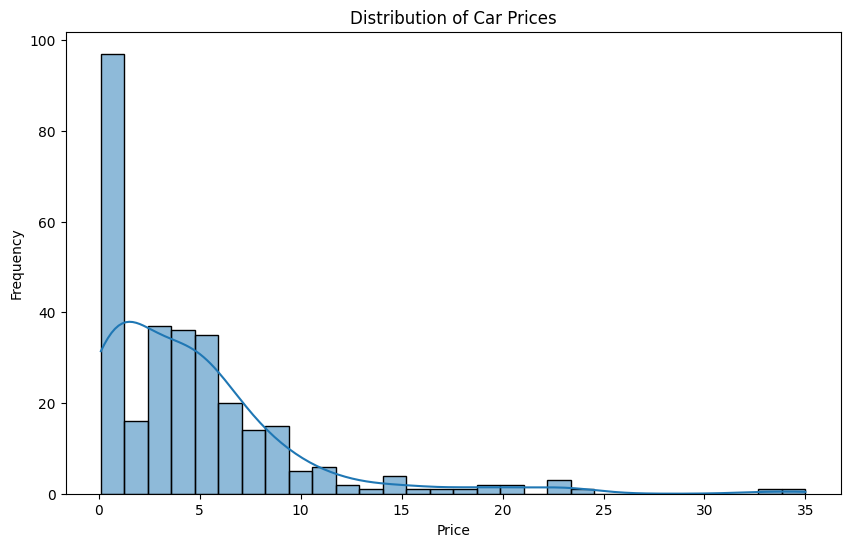

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


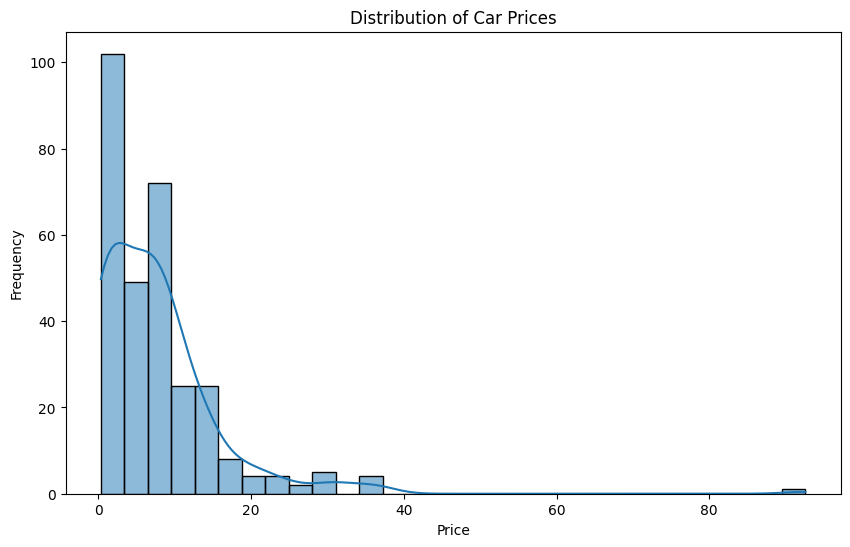

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Present_Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# **Bivariate Analysis**

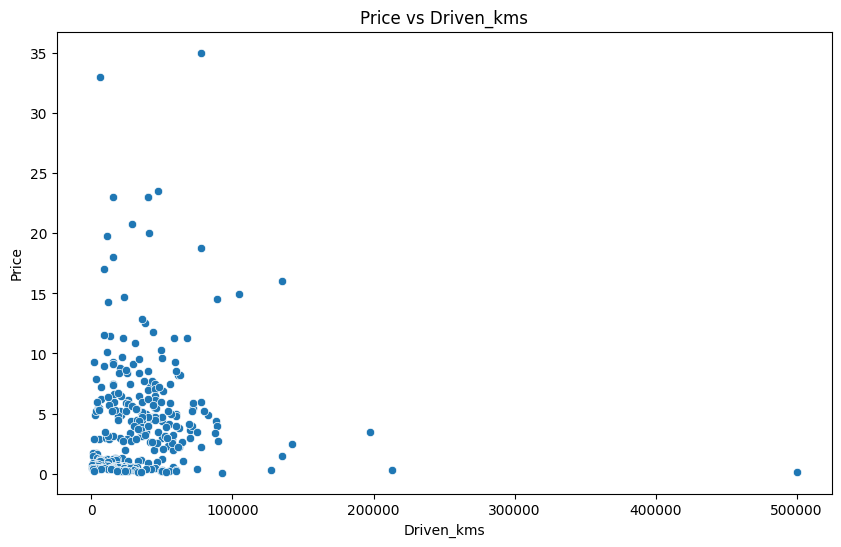

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=car_data)
plt.title('Price vs Driven_kms')
plt.xlabel('Driven_kms')
plt.ylabel('Price')
plt.show()

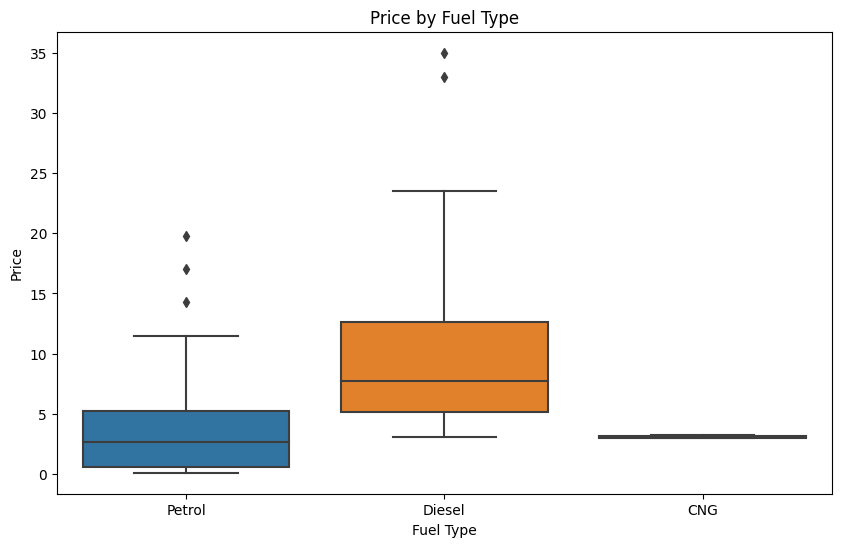

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

**Handling Outliers**

In [18]:
car_data = car_data[car_data['Selling_Price']<25.000000]

**importing dependencies**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [20]:
y  = car_data['Selling_Price']
X = car_data.drop(columns = ['Selling_Price'])

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

**Transforming categorical to numerical values and creating pipeline**

In [22]:
ohe = OneHotEncoder()
ohe.fit(X[['Car_Name','Fuel_Type','Transmission','Selling_type']])

OneHotEncoder()

In [23]:
ohe.categories_

[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
        'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
        'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
        'Bajaj Avenger Street 220', 'Bajaj Discover 100',
        'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
        'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
        'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
        'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
        'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
        'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
        'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
        'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
        'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
        'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
        'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',


In [24]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Car_Name','Fuel_Type','Transmission','Selling_type']),remainder = 'passthrough')

In [25]:
lr = LinearRegression()

In [26]:
pipe = make_pipeline(column_trans,lr)

In [27]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Baj...
       'grand i10', 'i10', 'i20', 'ignis', 'innova', 'jazz', 'omni',
       'ritz', 's cross', 'swift', 'sx4', 'verna', 'vitara brezza',
       'wagon r', 'xcent'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['Dealer', 'Individual'], dtype=object)]),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Transmission',
                                                   'Selling_type'])])),
                ('linearregression', LinearRegression())])

In [28]:
y_pred = pipe.predict(X_test)

**r2 score without selecting random state**

In [29]:
r2score = r2_score(y_test,y_pred)
r2score

0.9144327129229404

**Iterating through loop of random states to find the best accuracy**

In [30]:
scores = []
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [31]:
scores[np.argmax(scores)]

0.9609373489618993

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))

0.9609373489618993
